In [ ]:
#!pip install pandas matplotlib

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

Los primeros datos que queremos analizar son las horas en las que se produjo el mayor numero de crimes 

In [3]:
df = pd.read_csv("hours.csv", header=None, names=['Hora', 'Cantidad'])

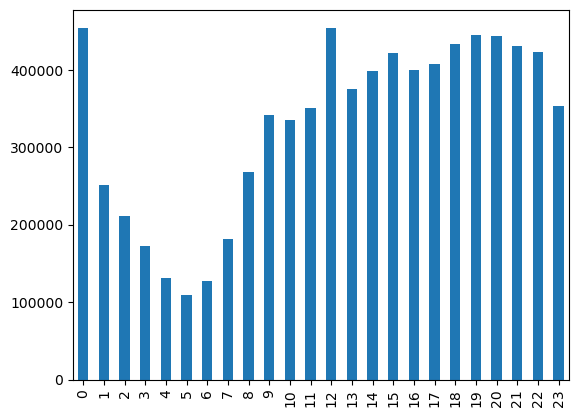

In [4]:
df["Cantidad"].plot(kind="bar")

plt.show()


In [6]:
media_ponderada = (df['Hora'] * df['Cantidad']).sum() / df['Cantidad'].sum()
media_ponderada

13.113745192475148

In [7]:
desviacion_estandar = df['Hora'].std()
desviacion_estandar

7.0710678118654755

In [9]:
estadisticas = df['Cantidad'].describe()
print(estadisticas)

count        24.000000
mean     330168.166667
std      116858.789510
min      109428.000000
25%      241718.000000
50%      364192.000000
75%      425142.500000
max      454804.000000
Name: Cantidad, dtype: float64


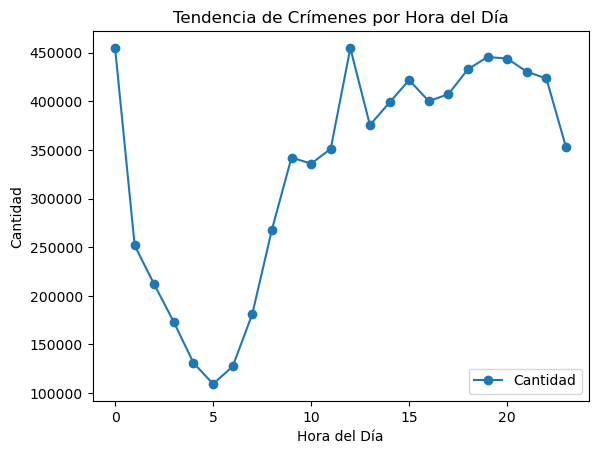

In [11]:
df.plot(x='Hora', y='Cantidad', marker='o')
plt.title('Tendencia de Crímenes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad')
plt.show()

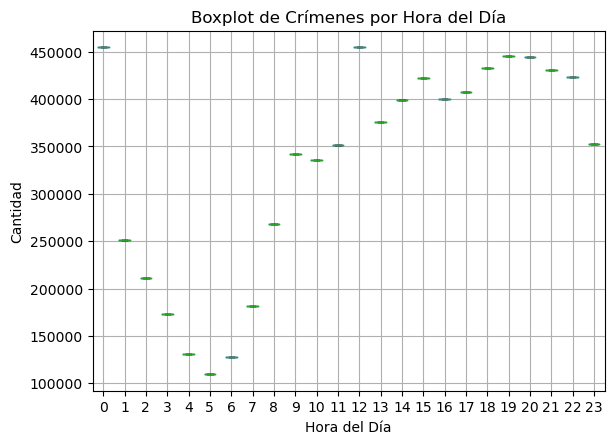

In [10]:
df.boxplot(column='Cantidad', by='Hora')
plt.title('Boxplot de Crímenes por Hora del Día')
plt.suptitle('')  # Elimina el título automático
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad')
plt.show()

**Conclusiones:**
    
  Primero con respecto a los resultados obtenidos de cuales son las horas en las que se producen mayores crímenes, gracias a esta gráfica podemos ver que los crímenes se concentran en la franja horaria comprendida entre las 18-21 horas a pesar de no ser el pico en cuanto a número, el pico se produce a las 12 de la noche. Esto nos hace ver que la mayoría de los crímenes en Chicago se producen en horas en las cuales la mayoría de la población está regresando de sus trabajos y por lo tanto hay una mayor actividad tanto en las calles, como en los restaurantes y el transporte, haciendo de estas 4 horas la oportunidad perfecta para llevar a cabo robos.   

In [4]:
df = pd.read_csv("most_problematic_Street_by_district.csv", header=None, names=['District',"Street", 'Cantidad'])

In [5]:
df= df.dropna()

In [8]:
df

,District,Street,Cantidad
1,1.0,STATE ST,71387
2,2.0,DR MARTIN,21219
3,3.0,DR MARTIN,26086
4,4.0,STONY ISLAND,16318
5,5.0,MICHIGAN AVE,21819
6,6.0,79TH ST,27057
7,7.0,ASHLAND AVE,22625
8,8.0,CICERO AVE,24806
9,9.0,ASHLAND AVE,15187
10,10.0,CERMAK RD,18214


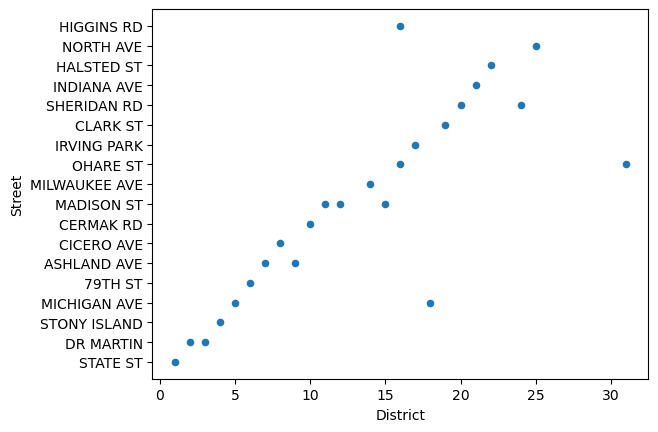

In [6]:
df.plot(kind="scatter", x="District", y="Street" )
plt.show()

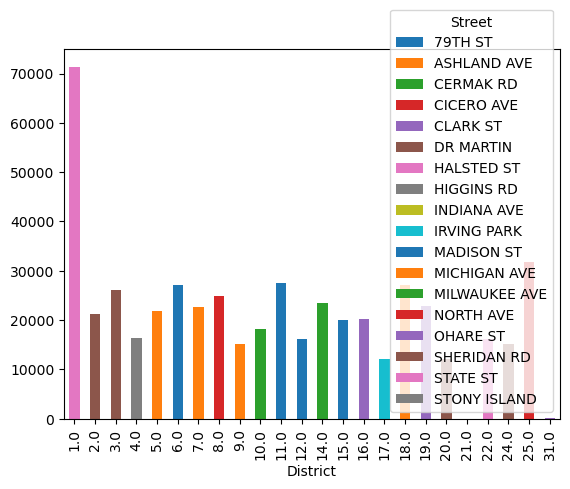

In [7]:
df.pivot(index='District', columns='Street', values='Cantidad').plot(kind='bar', stacked=True)
plt.show()

In [68]:
df2 = pd.read_csv("year_district_crimes.csv", header=None, names=['Year',"District", 'Cantidad'])

In [69]:
suma = df2["Cantidad"].sum()
print(suma)

7924036


In [58]:
df2= df2.dropna()

In [59]:
df2

,Year,District,Cantidad
0,2001,1.0,14861
1,2001,2.0,35407
2,2001,3.0,24312
3,2001,4.0,25121
4,2001,5.0,20007
...,...,...,...
533,2023,20.0,4452
534,2023,22.0,6676
535,2023,24.0,7350
536,2023,25.0,11136


In [54]:
df_max = pd.read_csv("most_crimes_in_district.csv", header=None, names=['Year', 'Cantidad'])
print(df_max)

    Year  Cantidad
0   2016     18654
1   2012     22724
2   2020     15056
3   2019     18720
4   2017     18069
5   2014     20671
6   2013     21956
7   2005     31353
8   2002     32100
9   2018     19275
10  2009     28639
11  2006     32270
12  2004     31404
13  2011     25384
14  2022     14812
15  2008     30859
16  2007     31107
17  2023     13575
18  2021     13957
19  2015     19535
20  2001     35407
21  2010     26531
22  2003     31709


In [63]:
# Combina los dos DataFrames en base al año y la cantidad máxima
result_df = pd.merge(df_max, df2, on=['Year', 'Cantidad'], how='left')

# Muestra el DataFrame resultante
print(result_df.sort_values(by='Year', ascending=True))

    Year  Cantidad  District
20  2001     35407       2.0
8   2002     32100       8.0
22  2003     31709       8.0
12  2004     31404       8.0
7   2005     31353       8.0
11  2006     32270       8.0
16  2007     31107       8.0
15  2008     30859       8.0
10  2009     28639       8.0
21  2010     26531       8.0
13  2011     25384       8.0
1   2012     22724       8.0
6   2013     21956      11.0
5   2014     20671      11.0
19  2015     19535      11.0
0   2016     18654      11.0
4   2017     18069      11.0
9   2018     19275      11.0
3   2019     18720      11.0
2   2020     15056      11.0
18  2021     13957      11.0
14  2022     14812       8.0
17  2023     13575       8.0


Que paso en 2013 que hizo que cambiara la tendencia de la comisaría que más crímenes atendía y que volvió a pasar en 2022 para volver a cambiar la tendencia 

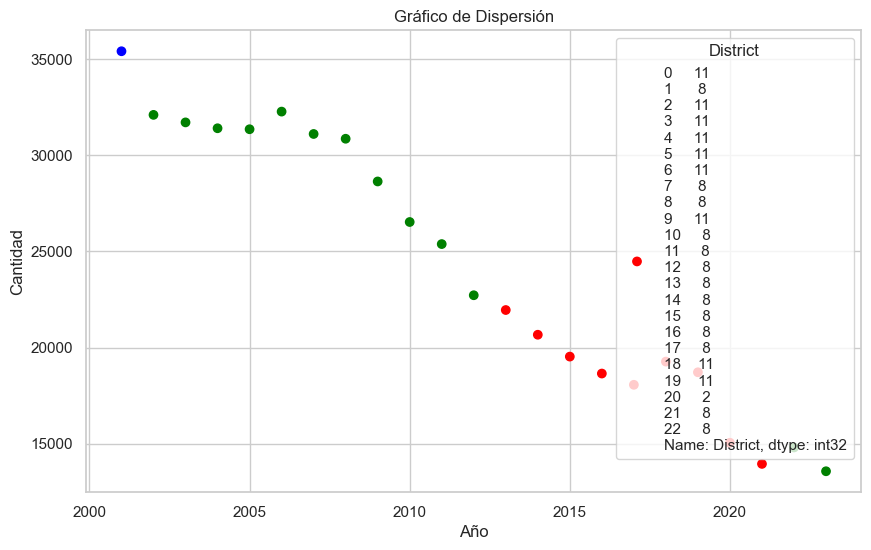

In [61]:
plt.figure(figsize=(10, 6))

# Colorear puntos por distrito
colors = {2.0: 'blue', 8.0: 'green', 11.0: 'red'}
plt.scatter(result_df['Year'], result_df['Cantidad'], c=result_df['District'].map(colors), label=result_df['District'].astype(int))

# Configuración del gráfico
plt.title('Gráfico de Dispersión')
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.legend(title='District')

# Mostrar el gráfico
plt.show()

In [23]:
df_media1 = df2.groupby('District')['Cantidad'].mean().reset_index()
df_media1

,District,Cantidad
0,1.0,14011.478261
1,2.0,16337.217391
2,3.0,17467.217391
3,4.0,19557.347826
4,5.0,15241.608696
5,6.0,20151.347826
6,7.0,19834.130435
7,8.0,23137.260870
8,9.0,16810.043478
9,10.0,14841.695652


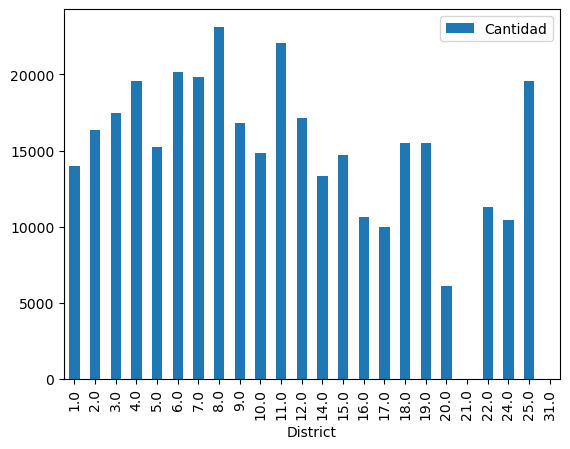

In [25]:
df_media1.plot(x='District', y='Cantidad',kind="bar")

plt.show()

In [14]:
df_filtered = df2[df2['Year'] == 2020]

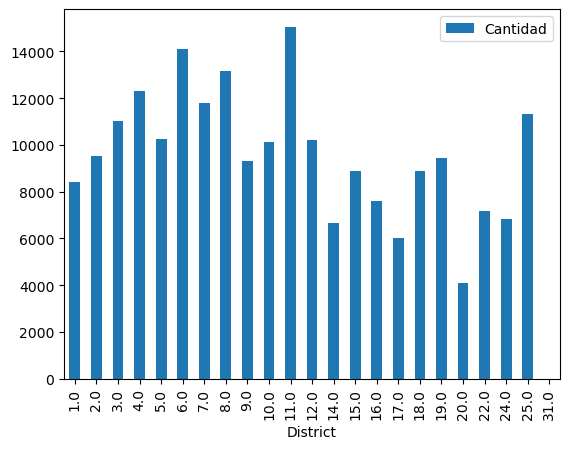

In [17]:
df_filtered.plot(x='District', y='Cantidad',kind="bar")

plt.show()

In [19]:
df_filtered = df2[df2['Year'].isin([2019, 2020])]
df_filtered

,Year,District,Cantidad
421,2019,1.0,15304
422,2019,2.0,11258
423,2019,3.0,12516
424,2019,4.0,14063
425,2019,5.0,11381
426,2019,6.0,16891
427,2019,7.0,13736
428,2019,8.0,15734
429,2019,9.0,11026
430,2019,10.0,12501


In [20]:
df_media = df_filtered.groupby('District')['Cantidad'].mean().reset_index()
df_media

,District,Cantidad
0,1.0,11858.0
1,2.0,10392.0
2,3.0,11776.0
3,4.0,13192.5
4,5.0,10825.5
5,6.0,15497.0
6,7.0,12758.0
7,8.0,14456.5
8,9.0,10159.5
9,10.0,11309.0


**Conclusiones: **



In [12]:
df3 = pd.read_csv("typeOfCrime.csv", header=None, names=['Type',"Year", 'Cantidad'])

In [13]:
df3

,Type,Year,Cantidad
0,BATTERY,2019,49517
1,NARCOTICS,2003,54288
2,BATTERY,2004,87136
3,OTHER OFFENSE,2003,31148
4,CRIMINAL DAMAGE,2013,30855
...,...,...,...
715,NON-CRIMINAL,2022,5
716,BATTERY,2005,83964
717,BATTERY,2002,94153
718,KIDNAPPING,2020,120


In [15]:
df_sorted_Year = df3.sort_values(by='Year', ascending=True)
df_sorted_Year

,Type,Year,Cantidad
405,HOMICIDE,2001,667
315,BURGLARY,2001,26014
323,OTHER NARCOTIC VIOLATION,2001,6
325,DECEPTIVE PRACTICE,2001,14949
345,PUBLIC PEACE VIOLATION,2001,2750
...,...,...,...
259,ARSON,2023,407
263,DECEPTIVE PRACTICE,2023,12979
266,HUMAN TRAFFICKING,2023,8
90,PUBLIC PEACE VIOLATION,2023,704


In [19]:
#Crímenes más repetidos en 2023
df_filtered = df3[df3['Year'] == 2023]
df_2023 = df_filtered.sort_values(by='Cantidad', ascending=False)
print(df_2023.head())

                    Type  Year  Cantidad
386                THEFT  2023     45521
124              BATTERY  2023     35950
383      CRIMINAL DAMAGE  2023     24346
330  MOTOR VEHICLE THEFT  2023     23941
376              ASSAULT  2023     18364


In [23]:
#Crímenes más repetidos que sobrepasan una cantidad preocupante 
df_most_repeated_crimes = df3[df3['Cantidad'] >= 65000]
print(df_most_repeated_crimes.sort_values(by='Year', ascending=True))

        Type  Year  Cantidad
423    THEFT  2001     99277
222  BATTERY  2001     93463
717  BATTERY  2002     94153
311    THEFT  2002     98334
160  BATTERY  2003     88380
157    THEFT  2003     98876
2    BATTERY  2004     87136
21     THEFT  2004     95464
185    THEFT  2005     85684
716  BATTERY  2005     83964
212  BATTERY  2006     80666
219    THEFT  2006     86240
121    THEFT  2007     85156
247  BATTERY  2007     79593
71     THEFT  2008     88437
26   BATTERY  2008     75930
273    THEFT  2009     80976
284  BATTERY  2009     68460
352  BATTERY  2010     65401
183    THEFT  2010     76757
137    THEFT  2011     75153
409    THEFT  2012     75465
87     THEFT  2013     71535
243    THEFT  2018     65287


In [20]:
top_crimes_by_year = pd.DataFrame(columns=df3.columns)

# Obtener la lista de años únicos en tu DataFrame
unique_years = df3['Year'].unique()

# Iterar sobre cada año y obtener los 5 crímenes más repetidos
for year in unique_years:
    # Filtrar el DataFrame para el año actual
    df_filtered = df3[df3['Year'] == year]
    
    # Ordenar por 'Cantidad' de forma descendente
    df_year_top5 = df_filtered.sort_values(by='Cantidad', ascending=False).head(5)
    
    # Concatenar los resultados al DataFrame principal
    top_crimes_by_year = pd.concat([top_crimes_by_year, df_year_top5])

# Mostrar el DataFrame final con los 5 crímenes más repetidos por año
print(top_crimes_by_year)

                   Type  Year Cantidad
32                THEFT  2019    62492
0               BATTERY  2019    49517
175     CRIMINAL DAMAGE  2019    26681
25              ASSAULT  2019    20620
327  DECEPTIVE PRACTICE  2019    19068
..                  ...   ...      ...
183               THEFT  2010    76757
352             BATTERY  2010    65401
333           NARCOTICS  2010    43398
190     CRIMINAL DAMAGE  2010    40654
122            BURGLARY  2010    26422

[115 rows x 3 columns]


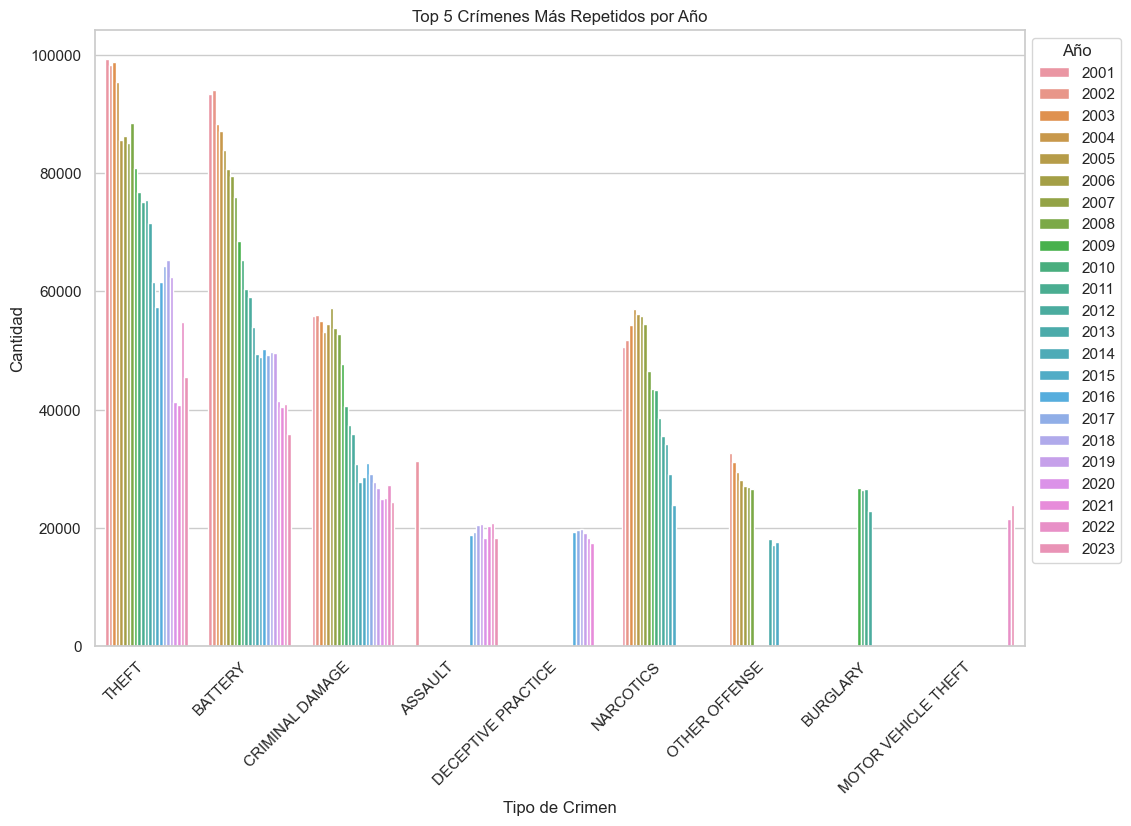

In [32]:
import seaborn as sns 
sns.set(style="whitegrid")

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras agrupado por año y tipo de crimen
sns.barplot(x='Type', y='Cantidad', hue='Year', data=top_crimes_by_year)

# Configurar etiquetas y título del gráfico
plt.xlabel('Tipo de Crimen')
plt.ylabel('Cantidad')
plt.title('Top 5 Crímenes Más Repetidos por Año')

# Ajustar la leyenda
plt.legend(title='Año', bbox_to_anchor=(1, 1))

# Rotar las etiquetas del eje x para mayor claridad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

In [33]:
top_crimes_by_year2001=top_crimes_by_year[top_crimes_by_year['Year'] == 2001]
print(top_crimes_by_year2001)

                Type  Year Cantidad
423            THEFT  2001    99277
222          BATTERY  2001    93463
94   CRIMINAL DAMAGE  2001    55860
119        NARCOTICS  2001    50567
95           ASSAULT  2001    31384


In [37]:
top_crimes_theft=top_crimes_by_year[top_crimes_by_year['Type'] == "THEFT"]
print(top_crimes_theft.sort_values(by='Cantidad', ascending=False))

      Type  Year Cantidad
423  THEFT  2001    99277
157  THEFT  2003    98876
311  THEFT  2002    98334
21   THEFT  2004    95464
71   THEFT  2008    88437
219  THEFT  2006    86240
185  THEFT  2005    85684
121  THEFT  2007    85156
273  THEFT  2009    80976
183  THEFT  2010    76757
409  THEFT  2012    75465
137  THEFT  2011    75153
87   THEFT  2013    71535
243  THEFT  2018    65287
96   THEFT  2017    64386
32   THEFT  2019    62492
261  THEFT  2016    61621
161  THEFT  2014    61568
364  THEFT  2015    57350
31   THEFT  2022    54840
386  THEFT  2023    45521
304  THEFT  2020    41324
118  THEFT  2021    40802


In [38]:
top_crimes_Battery=top_crimes_by_year[top_crimes_by_year['Type'] == "BATTERY"]
print(top_crimes_Battery.sort_values(by='Cantidad', ascending=False))

        Type  Year Cantidad
717  BATTERY  2002    94153
222  BATTERY  2001    93463
160  BATTERY  2003    88380
2    BATTERY  2004    87136
716  BATTERY  2005    83964
212  BATTERY  2006    80666
247  BATTERY  2007    79593
26   BATTERY  2008    75930
284  BATTERY  2009    68460
352  BATTERY  2010    65401
214  BATTERY  2011    60459
245  BATTERY  2012    59134
220  BATTERY  2013    54006
143  BATTERY  2016    50300
51   BATTERY  2018    49830
0    BATTERY  2019    49517
394  BATTERY  2014    49453
196  BATTERY  2017    49239
370  BATTERY  2015    48924
258  BATTERY  2020    41514
402  BATTERY  2022    40922
59   BATTERY  2021    40463
124  BATTERY  2023    35950


In [40]:
df4 = pd.read_csv("cirmes_with_arrest.csv", header=None, names=['Type','Cantidad'])
print(df4)

                                 Type  Cantidad
0          OFFENSE INVOLVING CHILDREN     11175
1             CRIMINAL SEXUAL ASSAULT       561
2                            STALKING       670
3              PUBLIC PEACE VIOLATION     33195
4                           OBSCENITY       654
5                               ARSON      1670
6                   DOMESTIC VIOLENCE         1
7                            GAMBLING     14522
8                   CRIMINAL TRESPASS    150900
9                             ASSAULT    109023
10               LIQUOR LAW VIOLATION     14866
11                MOTOR VEHICLE THEFT     31319
12                              THEFT    185043
13                            BATTERY    316762
14                            ROBBERY     27645
15                           HOMICIDE      6083
16                          RITUALISM         3
17                   PUBLIC INDECENCY       194
18                CRIM SEXUAL ASSAULT      4388
19                       INTIMIDATION   

In [67]:
suma2 = df4["Cantidad"].sum()
print(suma2)

2051298


In [71]:
#Porcentaje de crimenes en los que se acaba produciendo un arresto
suma2/suma*100

25.88703534411

In [72]:
df4.sort_values(by='Cantidad', ascending=False).head(5)

,Type,Cantidad
25,NARCOTICS,745556
13,BATTERY,316762
12,THEFT,185043
8,CRIMINAL TRESPASS,150900
9,ASSAULT,109023


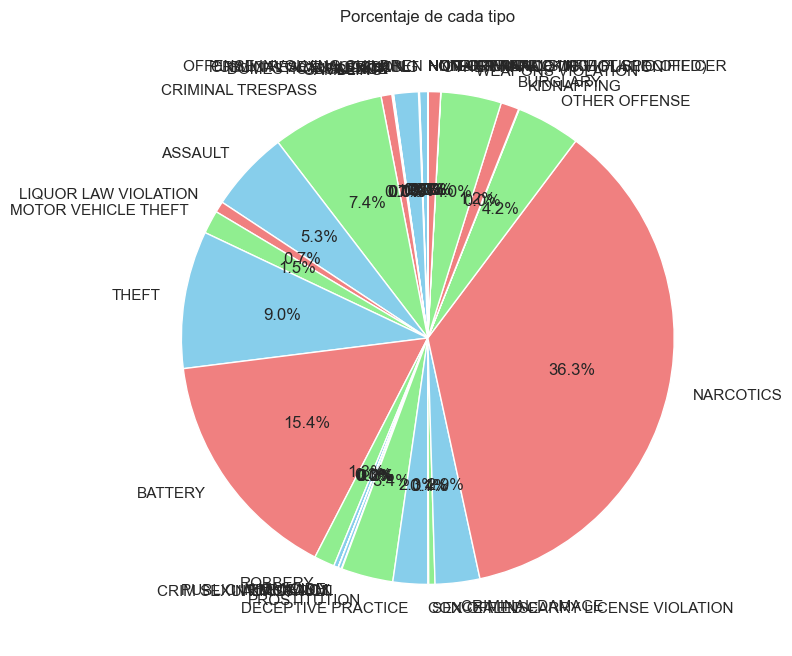

In [73]:
df4['Porcentaje'] = (df4['Cantidad'] / suma2) * 100

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(df4['Porcentaje'], labels=df4['Type'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Porcentaje de cada tipo')

# Mostrar el gráfico
plt.show()

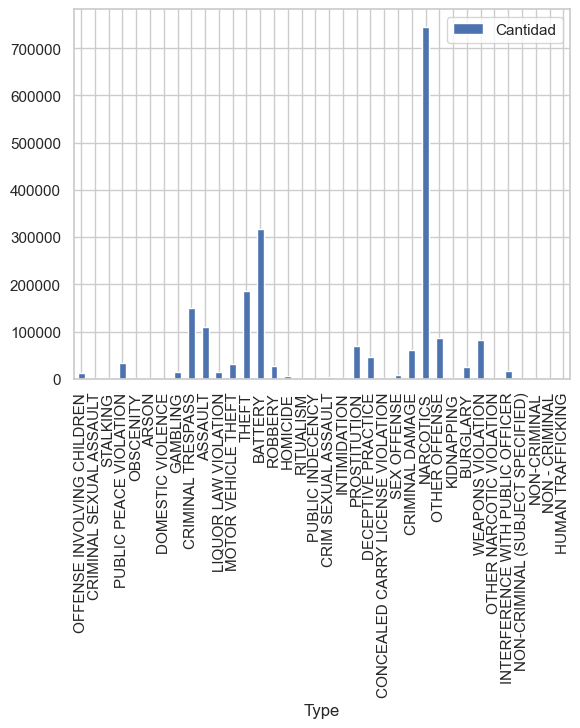

In [50]:
df4.plot(x='Type', y='Cantidad',kind="bar")

plt.show()

In [78]:
df_most_repeated_crimes_with_Arrest = df4[df4['Cantidad'] < 100000]
print(df_most_repeated_crimes_with_Arrest.sort_values(by='Cantidad', ascending=True))

                                 Type  Cantidad  Porcentaje
6                   DOMESTIC VIOLENCE         1    0.000049
32   NON-CRIMINAL (SUBJECT SPECIFIED)         3    0.000146
16                          RITUALISM         3    0.000146
34                     NON - CRIMINAL         6    0.000292
35                  HUMAN TRAFFICKING        10    0.000487
33                       NON-CRIMINAL        14    0.000682
30           OTHER NARCOTIC VIOLATION       101    0.004924
17                   PUBLIC INDECENCY       194    0.009457
1             CRIMINAL SEXUAL ASSAULT       561    0.027349
4                           OBSCENITY       654    0.031882
2                            STALKING       670    0.032662
19                       INTIMIDATION       719    0.035051
27                         KIDNAPPING       785    0.038268
22  CONCEALED CARRY LICENSE VIOLATION      1138    0.055477
5                               ARSON      1670    0.081412
18                CRIM SEXUAL ASSAULT   

In [79]:
suma_total = df_most_repeated_crimes_with_Arrest["Cantidad"].sum()
print(suma_total)

544014


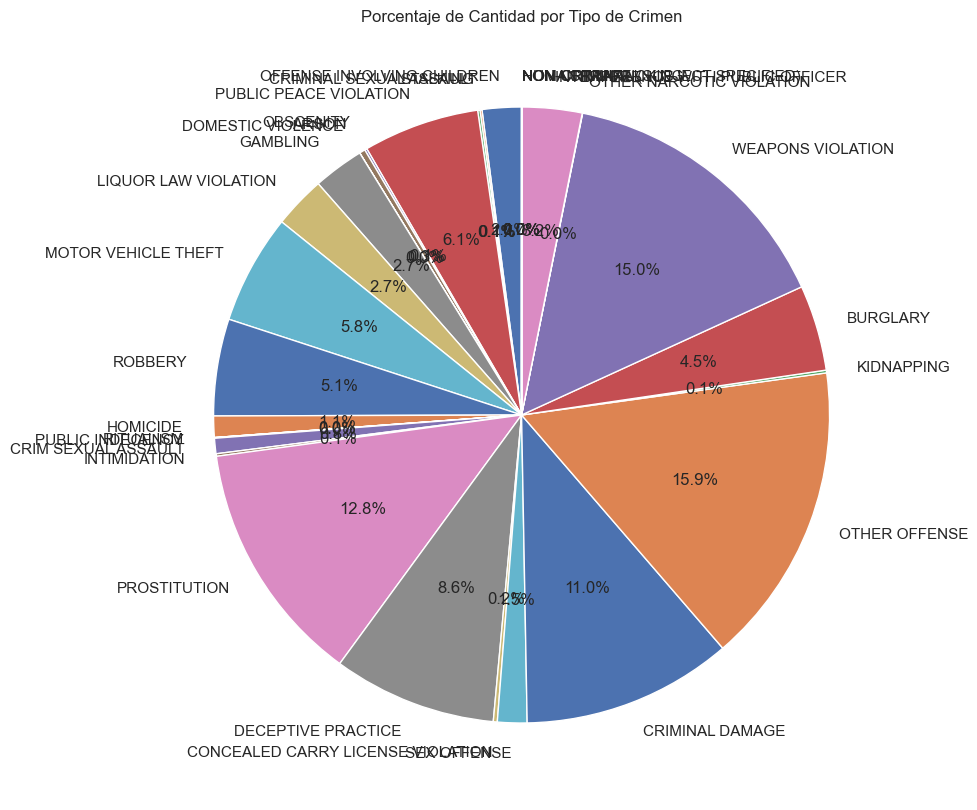

In [83]:
labels = df_most_repeated_crimes_with_Arrest['Type']
sizes = df_most_repeated_crimes_with_Arrest['Porcentaje']

# Crear un gráfico circular
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Cantidad por Tipo de Crimen')

# Mostrar el gráfico
plt.show()

In [80]:
suma_total/suma2*100

26.520476303296743

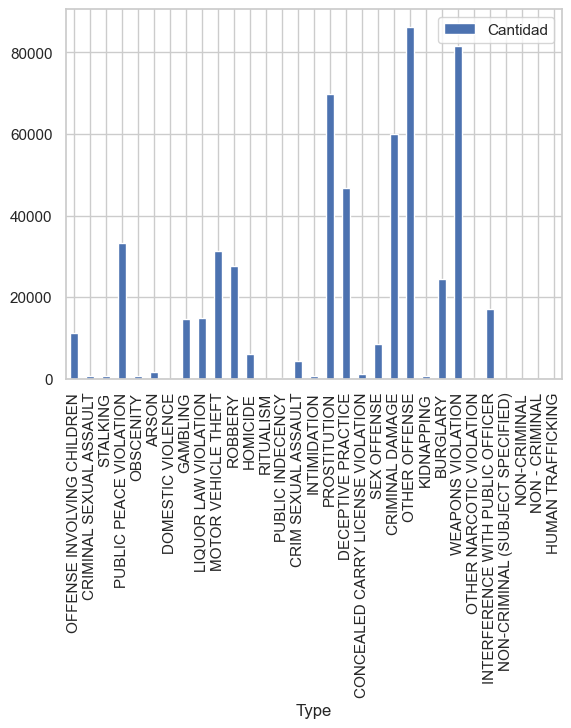

In [81]:
df_most_repeated_crimes_with_Arrest.plot(x='Type', y='Cantidad',kind="bar")

plt.show()

In [84]:
df_most_repeated_crimes_with_Arrest = df4[df4['Cantidad'] > 100000]
print(df_most_repeated_crimes_with_Arrest.sort_values(by='Cantidad', ascending=False))

                 Type  Cantidad  Porcentaje
25          NARCOTICS    745556   36.345572
13            BATTERY    316762   15.442027
12              THEFT    185043    9.020776
8   CRIMINAL TRESPASS    150900    7.356318
9             ASSAULT    109023    5.314830


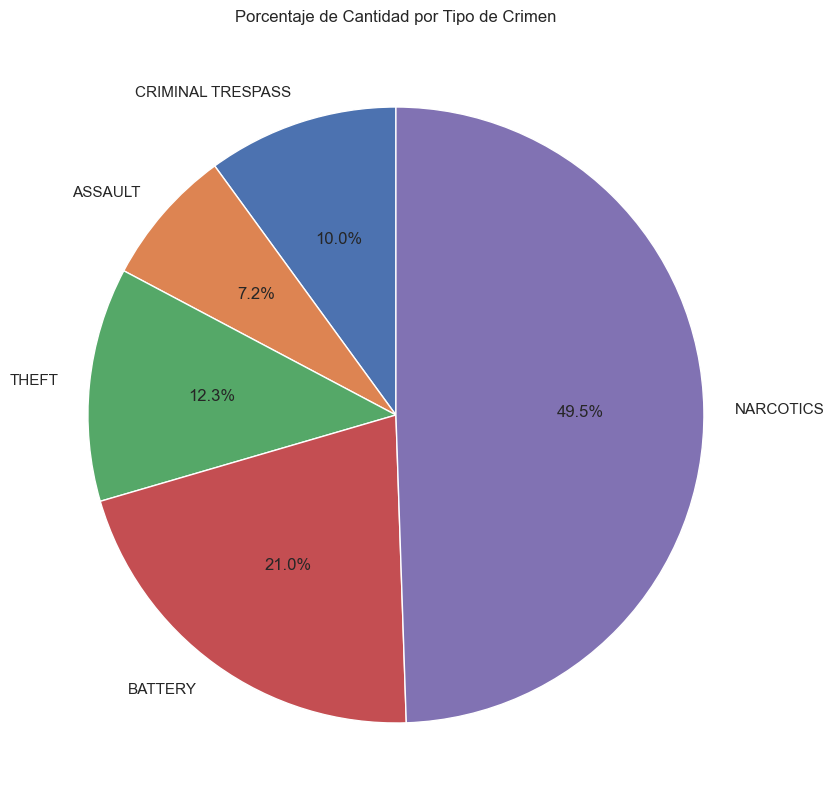

In [85]:
labels = df_most_repeated_crimes_with_Arrest['Type']
sizes = df_most_repeated_crimes_with_Arrest['Porcentaje']

# Crear un gráfico circular
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de Cantidad por Tipo de Crimen')

# Mostrar el gráfico
plt.show()

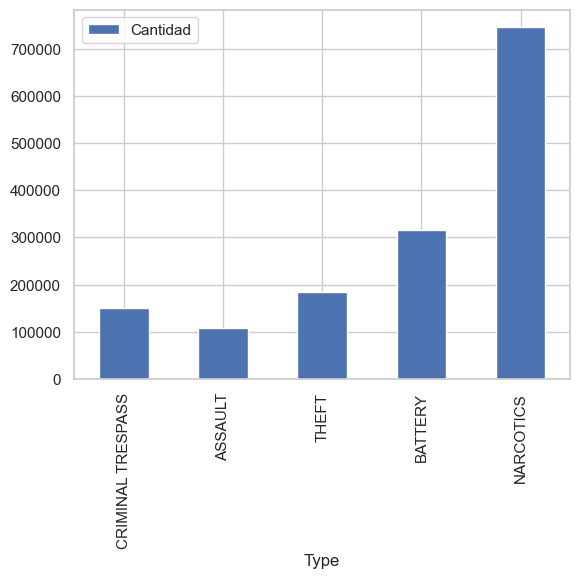

In [86]:
df_most_repeated_crimes_with_Arrest.plot(x='Type', y='Cantidad',kind="bar")

plt.show()